# Stock Data Analysis

This notebook analyzes stock market data using various machine learning models, providing insights into feature importance, correlations, and model performance.

## Load Modules and Data

In [1]:
from src.modules import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

2024-12-21 01:12:55.200089: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 01:12:55.209837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734772375.221051  742188 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734772375.224353  742188 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 01:12:55.235901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Feature Importances Visualization

### Extract Feature Importances

In [2]:

def plot_feature_importances(model, feature_names, title):
    """
    Plots the feature importances for tree-based models.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.show()


### Feature Importances for XGBoost and RandomForest

I0000 00:00:1734772383.292423  742188 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13078 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1734772387.731815  742352 cuda_dnn.cc:529] Loaded cuDNN version 90300


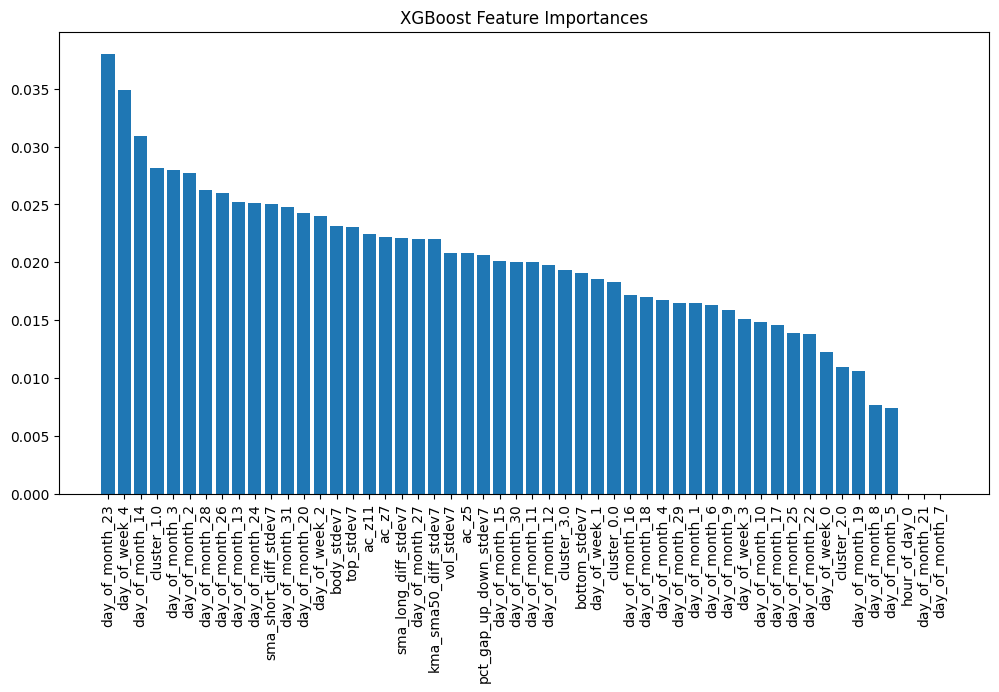

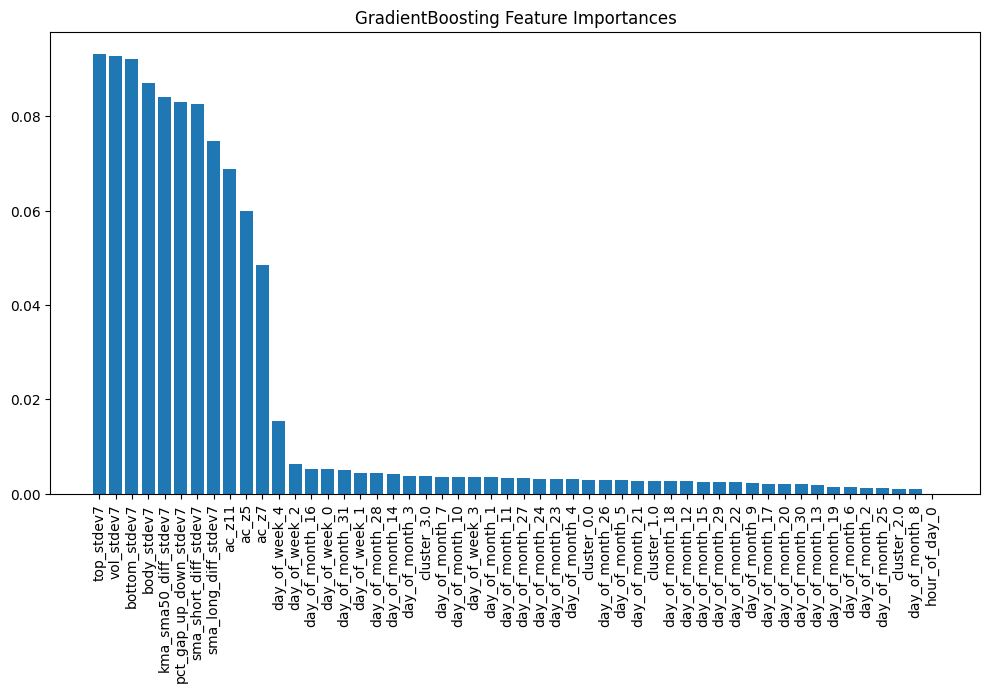

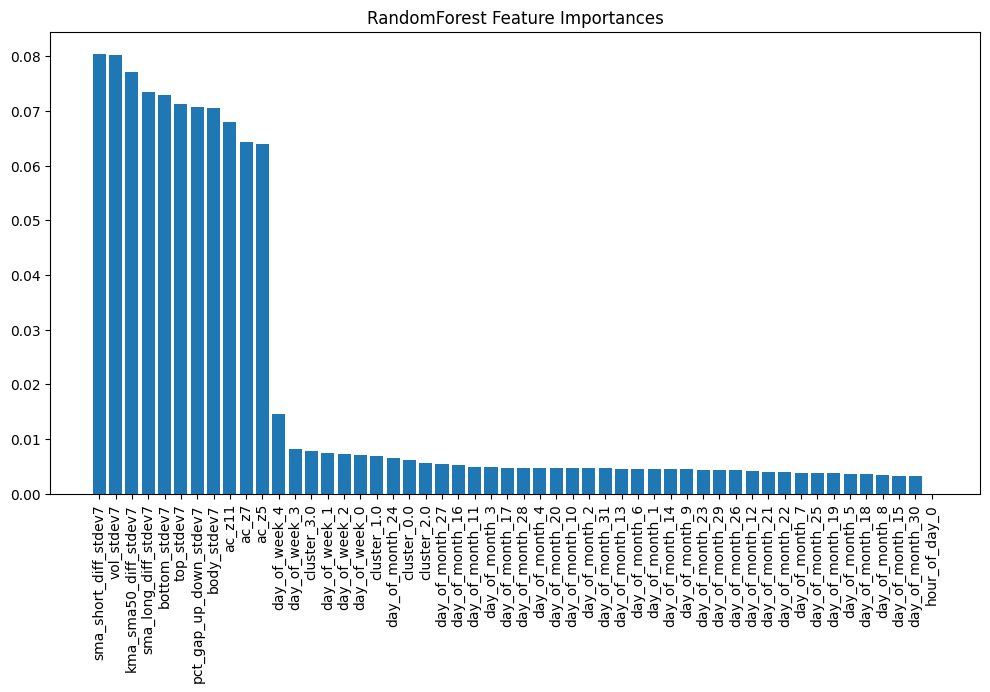

In [3]:

# Example usage
curr_prediction, models, feature_names, classification_reports = model('TSLA', '1d')

for model_name, fitted_model in models.items():
    if model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        plot_feature_importances(fitted_model, feature_names, f"{model_name} Feature Importances")


## Correlation Matrix

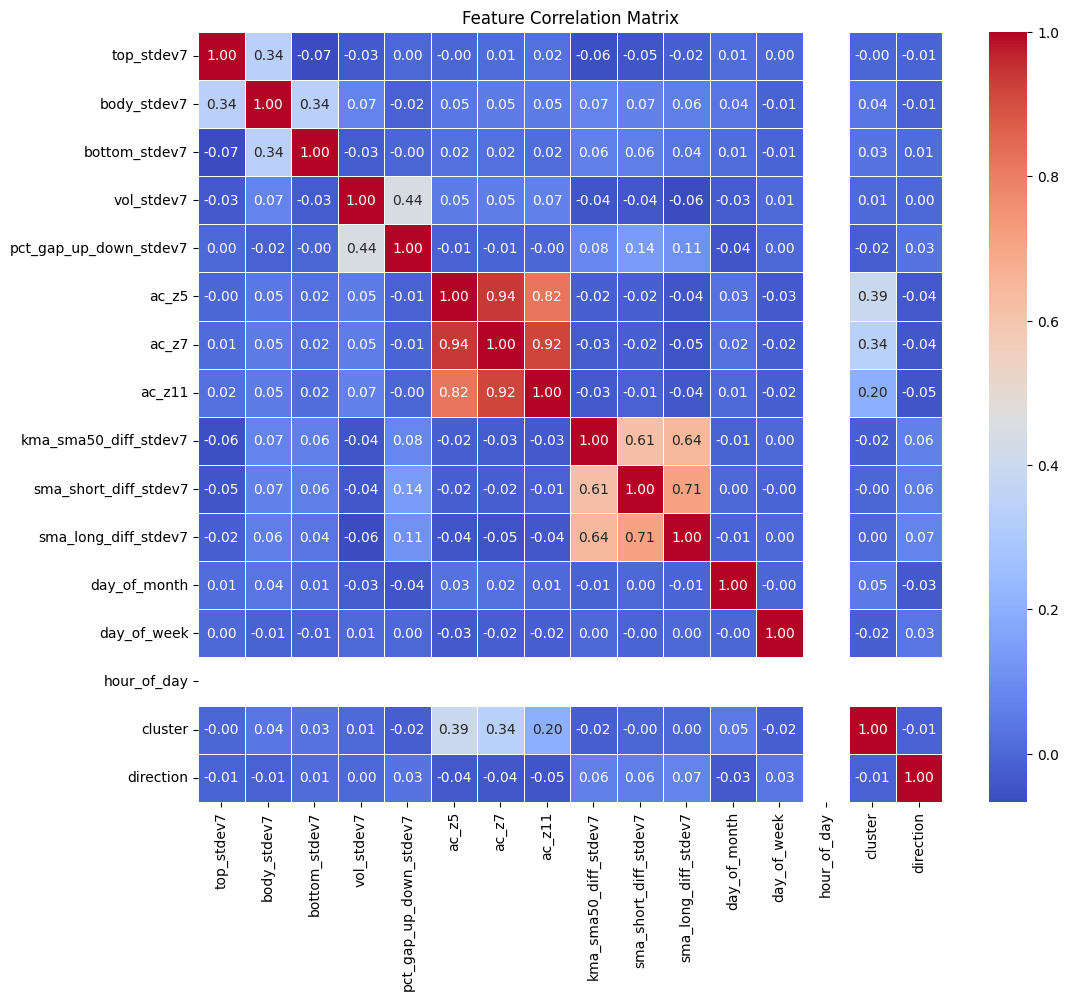

In [4]:

def plot_correlation_matrix(data, title):
    """
    Plots the correlation matrix heatmap.
    """
    corr = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Load transformed data
data = load_model_df('TSLA', '1d')
plot_correlation_matrix(data, "Feature Correlation Matrix")


## Model Performance Summary

In [5]:
# Generate summary table
summary_table = predictions('tsla')

TSLA 5m Interval Timestamp: 2024-12-21 04:13:37


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,static,down
kelly_1:2.5,0.225532,0.222857,0.182422,0.252581,0.139808
prob_up,0.432058,0.595053,0.388161,0.125,0.0
prob_static,0.256665,0.163754,0.3112,0.5,0.0
prob_down,0.311277,0.241193,0.300639,0.375,1.0
precision,0.446809,0.444898,0.416016,0.466129,0.385577
recall,0.425963,0.442191,0.432049,0.586207,0.813387
f1,0.436137,0.44354,0.423881,0.519317,0.523157
support,"[493.0, 493.0, 493.0]","[493.0, 493.0, 493.0]","[493.0, 493.0, 493.0]","[493.0, 493.0, 493.0]","[493.0, 493.0, 493.0]"


TSLA 15m Interval Timestamp: 2024-12-21 04:14:15


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,static,static,static,static,static
kelly_1:2.5,0.31066,0.321875,0.343961,0.153913,0.304895
prob_up,0.294562,0.096352,0.274933,0.375,0.0
prob_static,0.463013,0.792907,0.427491,0.375,1.0
prob_down,0.242425,0.110741,0.297576,0.25,0.0
precision,0.507614,0.515625,0.531401,0.395652,0.503497
recall,0.613497,0.607362,0.674847,0.558282,0.441718
f1,0.555556,0.557746,0.594595,0.463104,0.470588
support,"[162.0, 163.0, 164.0]","[162.0, 163.0, 164.0]","[162.0, 163.0, 164.0]","[162.0, 163.0, 164.0]","[162.0, 163.0, 164.0]"


TSLA 1h Interval Timestamp: 2024-12-21 04:14:33


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,down,down,up,static
kelly_1:2.5,0.188665,0.131225,0.14554,0.111027,0.085192
prob_up,0.609551,0.358156,0.353385,0.5,0.0
prob_static,0.106151,0.070242,0.221362,0.25,1.0
prob_down,0.284298,0.571602,0.425253,0.25,0.0
precision,0.420475,0.379447,0.389671,0.365019,0.346566
recall,0.418182,0.350365,0.30292,0.349091,0.994575
f1,0.419325,0.364326,0.340862,0.356877,0.514019
support,"[550.0, 553.0, 548.0]","[550.0, 553.0, 548.0]","[550.0, 553.0, 548.0]","[550.0, 553.0, 548.0]","[550.0, 553.0, 548.0]"


TSLA 1d Interval Timestamp: 2024-12-21 04:15:20


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,down,up,up,down,static
kelly_1:2.5,0.146491,0.029333,0.059804,0.112418,0.069263
prob_up,0.262729,0.416209,0.381686,0.375,0.0
prob_static,0.287933,0.243805,0.27162,0.125,1.0
prob_down,0.449338,0.339987,0.346694,0.5,0.0
precision,0.390351,0.306667,0.328431,0.366013,0.335188
recall,0.372385,0.288703,0.280335,0.23431,1.0
f1,0.381156,0.297414,0.302483,0.285714,0.502083
support,"[239.0, 241.0, 239.0]","[239.0, 241.0, 239.0]","[239.0, 241.0, 239.0]","[239.0, 241.0, 239.0]","[239.0, 241.0, 239.0]"


TSLA 1wk Interval Timestamp: 2024-12-21 04:15:42


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,down,down,down,up,down
kelly_1:2.5,0.030769,0.102564,0.1,0.109091,0.069863
prob_up,0.206939,0.129906,0.263701,0.625,0.0
prob_static,0.079229,0.018415,0.142661,0.125,0.0
prob_down,0.713832,0.851679,0.593638,0.25,1.0
precision,0.307692,0.358974,0.357143,0.363636,0.335616
recall,0.244898,0.285714,0.306122,0.408163,1.0
f1,0.272727,0.318182,0.32967,0.384615,0.502564
support,"[49.0, 48.0, 49.0]","[49.0, 48.0, 49.0]","[49.0, 48.0, 49.0]","[49.0, 48.0, 49.0]","[49.0, 48.0, 49.0]"


TSLA 1mo Interval Timestamp: 2024-12-21 04:15:55


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,up,down
kelly_1:2.5,0.258824,0.066667,0.16,0.16,0.066667
prob_up,0.917581,0.998415,0.590858,0.5,0.0
prob_static,0.023398,0.00028,0.157033,0.125,0.0
prob_down,0.059021,0.001306,0.252109,0.375,1.0
precision,0.470588,0.333333,0.4,0.4,0.333333
recall,0.727273,0.454545,0.545455,0.545455,1.0
f1,0.571429,0.384615,0.461538,0.461538,0.5
support,"[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]"


### **Conclusions**

<br>  

1. **Gradient Boosting Shows Strong Performance Across Intervals**:  
   - Gradient Boosting consistently achieves higher precision, recall, and F1 scores compared to other models, particularly in shorter time intervals like 5 minutes and 15 minutes.  

<br>  

2. **LSTM Performance on Static Predictions**:  
   - The LSTM model predictions in most intervals achieves perfect recall (1.0), but its precision remains low, indicating potential over-prediction of the "static" class.  

<br>  

3. **Kelly Criterion Indicates Conservative Probabilities**:  
   - The Kelly Criterion values are generally low, indicating that the probabilities predicted by models are not confident enough to make aggressive bets across intervals.  

---

### **Next Steps**

<br>  

1. **Enhance LSTM Model Architecture**:  
    - Improve the LSTM model by:  
      - Incorporating more complex layers (e.g., Bidirectional LSTM).  
      - Reducing feature engineering, as stdev may weaken the learning rates of the LSTM model.  
      - Fine-tuning the hyperparameters such as batch size, learning rate, and dropout rate.  
      - Augmenting the dataset to balance predictions across "up," "static," and "down."  

<br>  

2. **Focus on Short-Term Intervals**:  
    - Given the stronger performance of models in shorter intervals (e.g., 5m and 15m), prioritize optimizing predictions in these intervals for actionable short-term trading strategies.  

<br>  

3. **Evaluate and Adjust Thresholds**:  
    - Adjust classification thresholds for models, particularly the LSTM and Gradient Boosting models, to improve precision without overly sacrificing recall. This can balance the trade-offs between false positives and false negatives.  

<br>  

4. **Use Profit and/or LSTM Regression Models to Predict Price**:  
    - Add regression models to see if classifier movement predictions mirror those of the regressor models.  
    - Project out in longer time intervals to spot trends.  
